### **CÉLULA 1: IMPORTAÇÃO DE BIBLIOTECAS**

Nesta célula, importamos todas as bibliotecas necessárias para a análise e construção dos modelos de Machine Learning. Cada biblioteca tem uma função específica:

*   **`pandas` (pd)**: Utilizada para manipulação e análise de dados, especialmente DataFrames.
*   **`numpy` (np)**: Fundamental para operações numéricas e matemáticas de alto desempenho.
*   **`matplotlib.pyplot` (plt)** e **`seaborn` (sns)**: Usadas para visualização de dados e criação de gráficos estatísticos.
*   **`sklearn.model_selection.train_test_split`**: Para dividir os dados em conjuntos de treinamento e teste.
*   **`sklearn.preprocessing.LabelEncoder`**: Para transformar variáveis categóricas em numéricas.
*   **`sklearn.ensemble.RandomForestClassifier`** e **`sklearn.naive_bayes.GaussianNB`**: Os algoritmos de Machine Learning que serão treinados.
*   **`sklearn.metrics`**: Contém funções para avaliar o desempenho dos modelos, como acurácia, precisão, recall, F1-Score e matriz de confusão.

O `sns.set(style="whitegrid")` configura um estilo padrão para os gráficos, tornando-os mais legíveis.

In [16]:
# ==============================================================================
# CÉLULA 1: IMPORTAÇÃO DE BIBLIOTECAS
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de Machine Learning (Scikit-Learn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)

# Configuração de estilo dos gráficos
sns.set(style="whitegrid")
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


### **CÉLULA 2: CARREGAMENTO E VISUALIZAÇÃO DOS DADOS**

Esta célula é responsável por carregar o conjunto de dados (`baseMLJurandir.csv`) em um DataFrame do pandas. Após o carregamento, exibimos as primeiras 5 linhas (`df.head()`) para ter uma visão inicial dos dados e confirmamos suas dimensões (`df.shape`).

Um bloco `try-except` é usado para lidar com a situação em que o arquivo não é encontrado, fornecendo uma mensagem de erro útil para o usuário.

In [ ]:
# ==============================================================================
# CÉLULA 2: CARREGAMENTO E VISUALIZAÇÃO DOS DADOS
# ==============================================================================
try:
    df = pd.read_csv('baseMLJurandir.csv')
    print(f"Dataset carregado com sucesso! Dimensões: {df.shape}")
    display(df.head())
except FileNotFoundError:
    print("ERRO: O arquivo 'baseMLJurandir.csv' não foi encontrado.")
    print("Por favor, faça o upload do arquivo na aba de arquivos à esquerda ou verifique o caminho.")

Dataset carregado com sucesso! Dimensões: (1084215, 12)


,saltos,nÃºcleo,modulaÃ§Ã£o,comprimento,primeiro slot,ultimo slot,XT,OSNR,banda,consumo energia,peso,resultado
0,1,5,16.0,1050.0,1,3,-120.0,16.613496,2.000000e+11,0.0,0.0,1
1,3,5,4.0,2850.0,1,3,-120.0,12.349501,1.000000e+11,0.0,0.0,1
2,3,5,4.0,2850.0,1,10,-120.0,12.227845,4.000000e+11,0.0,0.0,1
3,3,5,4.0,2850.0,1,8,-120.0,12.253261,3.000000e+11,0.0,0.0,1
4,3,5,8.0,1550.0,1,9,-120.0,14.713263,5.000000e+11,0.0,0.0,1


### **CÉLULA 3: PRÉ-PROCESSAMENTO E ENGENHARIA DE FEATURES**

Esta é uma etapa crucial para preparar os dados para o treinamento do modelo. Realizamos diversas transformações:

1.  **Correção de Colunas com Erro de Encoding**: Muitas vezes, caracteres especiais (como `ú` ou `ção`) podem ser carregados incorretamente (ex: `Ãºcleo`, `Ã§Ã£o`). Criamos uma função auxiliar (`corrigir_coluna`) para identificar e renomear essas colunas para seus nomes corretos (`núcleo`, `modulação`), garantindo que o código possa referenciá-las corretamente.

2.  **Criação da Variável Target (`aceito`)**: A coluna original `resultado` é usada para criar uma nova variável binária chamada `aceito`. Se `resultado` for `1`, `aceito` é `1` (indicando que o circuito foi aceito); caso contrário, `aceito` é `0` (indicando bloqueio). Esta será a variável que nossos modelos tentarão prever.

3.  **Remoção da Coluna Original `resultado`**: Após criar `aceito`, a coluna `resultado` se torna redundante e é removida do DataFrame.

4.  **Criação da Feature `slots_usados`**: Duas colunas existentes, `primeiro slot` e `ultimo slot`, são combinadas para criar uma nova e mais informativa feature, `slots_usados`, que representa a quantidade de slots utilizados. As colunas originais são então removidas.

5.  **Tratamento da Variável Categórica `modulação`**: A coluna `modulação` é uma variável categórica (representa diferentes tipos de modulação). Para que os algoritmos de Machine Learning possam processá-la, ela é convertida em um formato numérico usando `LabelEncoder`. Cada categoria única recebe um número inteiro.

Ao final, exibimos a estrutura do DataFrame processado e suas colunas para verificar as mudanças.

In [18]:
# ==============================================================================
# CÉLULA 3: PRÉ-PROCESSAMENTO E ENGENHARIA DE FEATURES
# ==============================================================================

print("Colunas do DataFrame antes do pré-processamento:", df.columns.tolist())

# --- Correção de Colunas com Erro de Encoding ---
# Função auxiliar para corrigir nome de colunas
def corrigir_coluna(df, prefixo_esperado, sufixos_erro, nome_correto):
    found_col = None
    for col in df.columns:
        if prefixo_esperado in col.lower():
            for sufixo in sufixos_erro:
                if sufixo in col:
                    found_col = col
                    break
            if found_col:
                break

    if found_col and found_col != nome_correto:
        df.rename(columns={found_col: nome_correto}, inplace=True)
        print(f"Coluna '{found_col}' renomeada para '{nome_correto}'.")
    elif found_col and found_col == nome_correto:
        print(f"Coluna '{nome_correto}' já está com o nome correto.")
    else:
        print(f"AVISO: A coluna '{nome_correto}' (ou sua variação com encoding errado) não foi encontrada no DataFrame.")

# Corrigir 'núcleo'
corrigir_coluna(df, 'n', ['Ãºcleo'], 'núcleo')

# Corrigir 'modulação'
corrigir_coluna(df, 'modula', ['Ã§Ã£o', 'ção'], 'modulação')
# --- Fim da Correção de Colunas ---

# 1. Criar variável target binária "aceito"
# aceito = 1 se resultado == 1, caso contrário 0 (bloqueio)
df['aceito'] = df['resultado'].apply(lambda x: 1 if x == 1 else 0)

# 2. Remover a coluna original "resultado"
df.drop('resultado', axis=1, inplace=True)

# 3. Criar feature "slots_usados" e remover "primeiro slot" e "ultimo slot"
df['slots_usados'] = df['ultimo slot'] - df['primeiro slot'] + 1
df.drop(['primeiro slot', 'ultimo slot'], axis=1, inplace=True)

# 4. Tratar variável categórica "modulação" com LabelEncoder
le = LabelEncoder()
if 'modulação' in df.columns and df['modulação'].dtype == 'object':
    df['modulação'] = le.fit_transform(df['modulação'])
    print("Classes de modulação codificadas:", list(le.classes_))
elif 'modulação' in df.columns:
    print("A coluna 'modulação' já parece ser numérica ou foi convertida, nenhuma alteração feita.")
else:
    print("ERRO: A coluna 'modulação' não foi encontrada no DataFrame após a tentativa de correção.")

print("\n--- Estrutura Final do Dataset ---")
display(df.head())
print(f"Colunas finais: {df.columns.tolist()}")

Colunas do DataFrame antes do pré-processamento: ['saltos', 'nÃºcleo', 'modulaÃ§Ã£o', 'comprimento', 'primeiro slot', 'ultimo slot', 'XT', 'OSNR', 'banda', 'consumo energia', 'peso', 'resultado']
Coluna 'nÃºcleo' renomeada para 'núcleo'.
Coluna 'modulaÃ§Ã£o' renomeada para 'modulação'.
A coluna 'modulação' já parece ser numérica ou foi convertida, nenhuma alteração feita.

--- Estrutura Final do Dataset ---


,saltos,núcleo,modulação,comprimento,XT,OSNR,banda,consumo energia,peso,aceito,slots_usados
0,1,5,16.0,1050.0,-120.0,16.613496,2.000000e+11,0.0,0.0,1,3
1,3,5,4.0,2850.0,-120.0,12.349501,1.000000e+11,0.0,0.0,1,3
2,3,5,4.0,2850.0,-120.0,12.227845,4.000000e+11,0.0,0.0,1,10
3,3,5,4.0,2850.0,-120.0,12.253261,3.000000e+11,0.0,0.0,1,8
4,3,5,8.0,1550.0,-120.0,14.713263,5.000000e+11,0.0,0.0,1,9


Colunas finais: ['saltos', 'núcleo', 'modulação', 'comprimento', 'XT', 'OSNR', 'banda', 'consumo energia', 'peso', 'aceito', 'slots_usados']


### **CÉLULA 4: SEPARAÇÃO EM TREINO E TESTE**

Para avaliar corretamente o desempenho de um modelo de Machine Learning, é fundamental dividirmos o conjunto de dados em duas partes:

*   **Conjunto de Treino (Training Set)**: Usado para treinar o modelo, ou seja, para que ele aprenda os padrões nos dados.
*   **Conjunto de Teste (Test Set)**: Usado para avaliar o desempenho do modelo em dados *nunca antes vistos*. Isso nos ajuda a ter uma ideia de como o modelo se comportará em situações reais e a evitar o *overfitting* (quando o modelo memoriza os dados de treino, mas não generaliza bem para novos dados).

Aqui, utilizamos `train_test_split` para separar os dados em 70% para treino e 30% para teste. O parâmetro `random_state=42` garante que a divisão seja sempre a mesma cada vez que o código for executado, tornando os resultados reprodutíveis.

In [19]:
# ==============================================================================
# CÉLULA 4: SEPARAÇÃO EM TREINO E TESTE
# ==============================================================================

# Definir X (features) e y (target)
X = df.drop('aceito', axis=1)
y = df['aceito']

# Separar: 70% Treino, 30% Teste
# random_state=42 garante reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(f"Tamanho do Treino: {X_train.shape[0]} amostras")
print(f"Tamanho do Teste: {X_test.shape[0]} amostras")

Tamanho do Treino: 758950 amostras
Tamanho do Teste: 325265 amostras


### **CÉLULA 5: TREINAMENTO DOS MODELOS**

Nesta célula, inicializamos e treinamos dois modelos de classificação diferentes:

1.  **Random Forest Classifier**: É um algoritmo de *ensemble learning* que constrói múltiplas árvores de decisão durante o treinamento e produz a classe que é a moda das classes de árvores individuais. É robusto, lida bem com dados não lineares e é menos propenso a overfitting que uma única árvore de decisão. O `n_estimators=100` indica que 100 árvores serão construídas.

2.  **Naive Bayes (GaussianNB)**: Um algoritmo de classificação baseado no Teorema de Bayes com a suposição de independência entre as *features*. O `GaussianNB` é usado quando as *features* seguem uma distribuição gaussiana (normal).

Ambos os modelos são treinados (`.fit()`) usando os dados de treino (`X_train`, `y_train`).

In [20]:
# ==============================================================================
# CÉLULA 5: TREINAMENTO DOS MODELOS
# ==============================================================================

# 1. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Modelo Random Forest treinado.")

# 2. Naive Bayes (GaussianNB)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
print("Modelo Naive Bayes treinado.")

Modelo Random Forest treinado.
Modelo Naive Bayes treinado.


### **CÉLULA 6: AVALIAÇÃO DOS MODELOS**

Após treinar os modelos, é fundamental avaliar seu desempenho. Uma função auxiliar `avaliar_modelo` foi criada para calcular e exibir métricas de avaliação comuns e uma matriz de confusão para cada modelo.

#### **Métricas de Avaliação:**

*   **Acurácia (Accuracy)**: A proporção de previsões corretas em relação ao total de previsões. É útil quando as classes são balanceadas.

*   **Precisão (Precision)**: Das previsões positivas do modelo, quantas estavam realmente corretas? É crucial quando o custo de um falso positivo é alto. Por exemplo, se nosso modelo prevê que um circuito será aceito (positivo), a precisão nos diz a chance de que ele *realmente* seja aceito.

*   **Recall (Sensibilidade)**: Dos casos realmente positivos, quantos o modelo conseguiu identificar corretamente? É fundamental quando o custo de um falso negativo é alto. Por exemplo, se um circuito *deveria* ser aceito (positivo real), o recall nos diz a chance de o modelo prevê-lo como aceito. No nosso contexto de aceitação/bloqueio de circuitos, um **alto Recall** para a classe `aceito=1` significa que o modelo é bom em identificar a maioria dos circuitos que *devem* ser aceitos, minimizando a chance de bloquear erroneamente um circuito válido (Falso Negativo).

*   **F1-Score**: É a média harmônica da Precisão e do Recall. É uma métrica útil quando se busca um equilíbrio entre Precisão e Recall, especialmente em datasets com classes desbalanceadas.

#### **Matriz de Confusão:**

A matriz de confusão é uma tabela que descreve o desempenho de um modelo de classificação em um conjunto de dados de teste para o qual os valores verdadeiros são conhecidos. Ela mostra o número de:

*   **Verdadeiros Positivos (VP)**: O modelo previu Positivo, e a realidade é Positivo.
*   **Verdadeiros Negativos (VN)**: O modelo previu Negativo, e a realidade é Negativo.
*   **Falsos Positivos (FP)**: O modelo previu Positivo, mas a realidade é Negativo (Erro Tipo I).
*   **Falsos Negativos (FN)**: O modelo previu Negativo, mas a realidade é Positivo (Erro Tipo II).

No nosso caso:
*   `0=Bloqueio`, `1=Aceito`
*   **VP**: O modelo previu 'Aceito', e o circuito foi 'Aceito'.
*   **VN**: O modelo previu 'Bloqueio', e o circuito foi 'Bloqueio'.
*   **FP**: O modelo previu 'Aceito', mas o circuito foi 'Bloqueio' (circuito bloqueado erroneamente).
*   **FN**: O modelo previu 'Bloqueio', mas o circuito foi 'Aceito' (circuito válido foi bloqueado).

O `classification_report` fornece um resumo detalhado dessas métricas para cada classe.

--- Resultados: Random Forest ---
Acurácia:  0.7996
Precision: 0.8300
Recall:    0.8724
F1-Score:  0.8506

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.73      0.66      0.70    112435
           1       0.83      0.87      0.85    212830

    accuracy                           0.80    325265
   macro avg       0.78      0.77      0.77    325265
weighted avg       0.80      0.80      0.80    325265



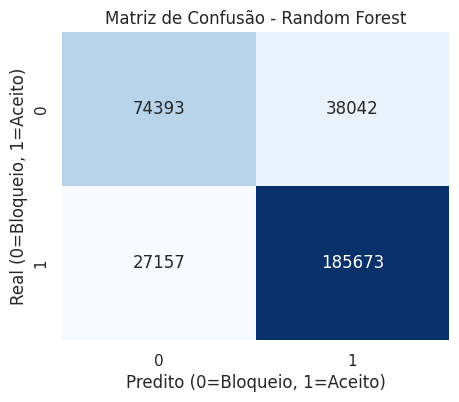

--- Resultados: Naive Bayes ---
Acurácia:  0.6651
Precision: 0.6706
Recall:    0.9594
F1-Score:  0.7894

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.58      0.11      0.18    112435
           1       0.67      0.96      0.79    212830

    accuracy                           0.67    325265
   macro avg       0.63      0.53      0.49    325265
weighted avg       0.64      0.67      0.58    325265



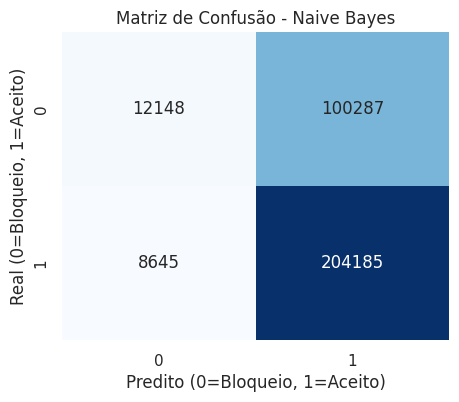

In [21]:
# ==============================================================================
# CÉLULA 6: AVALIAÇÃO DOS MODELOS
# ==============================================================================

def avaliar_modelo(modelo, nome_modelo, X_test, y_test):
    """Função auxiliar para calcular métricas e plotar matriz de confusão"""
    y_pred = modelo.predict(X_test)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"--- Resultados: {nome_modelo} ---")
    print(f"Acurácia:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.xlabel('Predito (0=Bloqueio, 1=Aceito)')
    plt.ylabel('Real (0=Bloqueio, 1=Aceito)')
    plt.show()

    return [acc, prec, rec, f1]

# Avaliar Random Forest
metrics_rf = avaliar_modelo(rf_model, "Random Forest", X_test, y_test)

# Avaliar Naive Bayes
metrics_nb = avaliar_modelo(nb_model, "Naive Bayes", X_test, y_test)

### **CÉLULA 7: COMPARAÇÃO FINAL DOS MODELOS**

Nesta célula, consolidamos as métricas de avaliação de ambos os modelos (Random Forest e Naive Bayes) em um DataFrame para facilitar a comparação. Em seguida, visualizamos essas métricas usando um gráfico de barras comparativo.

Essa comparação visual é muito útil para entender rapidamente qual modelo se sai melhor em cada métrica e tomar uma decisão informada sobre qual modelo é mais adequado para a tarefa em questão, considerando os objetivos do negócio (por exemplo, se é mais importante minimizar falsos positivos ou falsos negativos).


--- Comparação Lado a Lado ---


,Métrica,Random Forest,Naive Bayes
0,Acurácia,0.799551,0.665098
1,Precision,0.829953,0.670620
2,Recall,0.872401,0.959381
3,F1-Score,0.850648,0.789423


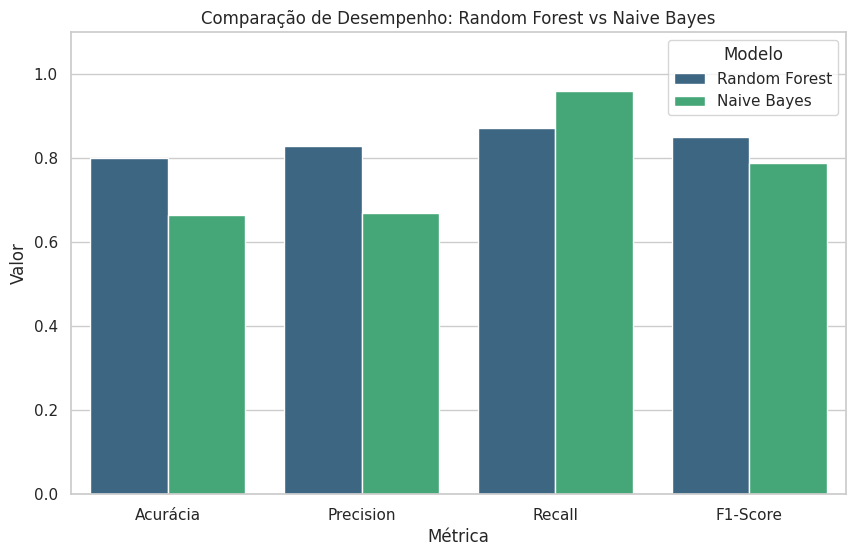

In [22]:
# ==============================================================================
# CÉLULA 7: COMPARAÇÃO FINAL DOS MODELOS
# ==============================================================================

# Criar DataFrame comparativo
df_compare = pd.DataFrame({
    'Métrica': ['Acurácia', 'Precision', 'Recall', 'F1-Score'],
    'Random Forest': metrics_rf,
    'Naive Bayes': metrics_nb
})

print("\n--- Comparação Lado a Lado ---")
display(df_compare)

# Gráfico de barras comparativo
df_compare_melted = df_compare.melt(id_vars="Métrica", var_name="Modelo", value_name="Valor")
plt.figure(figsize=(10, 6))
sns.barplot(x="Métrica", y="Valor", hue="Modelo", data=df_compare_melted, palette="viridis")
plt.title("Comparação de Desempenho: Random Forest vs Naive Bayes")
plt.ylim(0, 1.1)
plt.show()

### **CÉLULA 8: IMPORTÂNCIA DAS FEATURES (Apenas Random Forest)**

Os modelos Random Forest têm a capacidade de estimar a importância de cada feature (coluna de entrada) na previsão da variável alvo. Uma feature com alta importância significa que ela contribui significativamente para o poder preditivo do modelo.

Nesta célula, calculamos e visualizamos a importância das features para o modelo Random Forest. Isso nos ajuda a:

*   **Entender o domínio**: Quais fatores são mais relevantes para determinar a aceitação ou bloqueio de um circuito?
*   **Otimização de features**: Se algumas features têm importância muito baixa, elas podem ser removidas para simplificar o modelo sem grande perda de desempenho.
*   **Interpretabilidade**: Ajuda a explicar por que o modelo toma certas decisões.

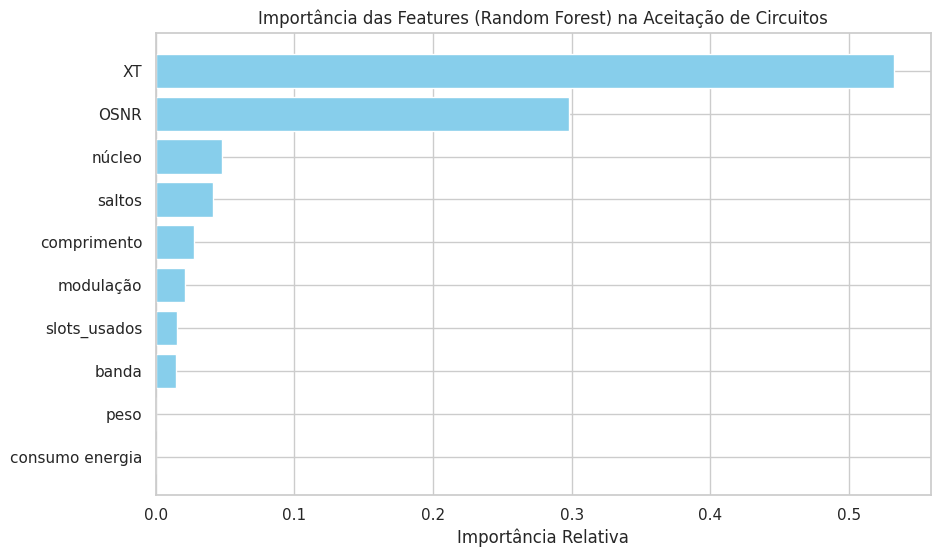

In [23]:
# ==============================================================================
# CÉLULA 8: IMPORTÂNCIA DAS FEATURES (Apenas Random Forest)
# ==============================================================================

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Importância das Features (Random Forest) na Aceitação de Circuitos")
plt.barh(range(X.shape[1]), importances[indices], align="center", color="skyblue")
plt.yticks(range(X.shape[1]), [features[i] for i in indices])
plt.xlabel("Importância Relativa")
plt.gca().invert_yaxis() # Inverter para a mais importante ficar no topo
plt.show()